# MELI DATA SCIENCE CHALLENGE

## Load and split data

In [12]:
import pandas as pd
import numpy as np

data = pd.read_json('MLA_100k_checked_v3.jsonlines', lines=True)

In [13]:
data.head(3)

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,...,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],...,2015-11-04 20:42:53,active,None,NaN,NaN,1,2015-09-05 20:42:53,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],...,2015-11-25 18:08:30,active,None,NaN,NaN,1,2015-09-26 18:08:30,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],...,2015-11-08 23:57:07,active,None,NaN,NaN,1,2015-09-09 23:57:07,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1


In [14]:
data.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition', 'deal_ids',
       'base_price', 'shipping', 'non_mercado_pago_payment_methods',
       'seller_id', 'variations', 'site_id', 'listing_type_id', 'price',
       'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [15]:
N = -10000
data_train = data[:N]
data_test = data[N:]
print(data_train.shape, data_test.shape)

(90000, 45) (10000, 45)


## Exploratory Data Analysis

In [16]:
# Description of data (only numeric variables, categorical and special variables will be analyzed later)
data_train.describe()

,base_price,seller_id,price,official_store_id,differential_pricing,original_price,catalog_product_id,subtitle,initial_quantity,sold_quantity,available_quantity
count,9.000000e+04,9.000000e+04,9.000000e+04,745.000000,0.0,130.000000,7.000000e+00,0.0,90000.000000,90000.000000,90000.000000
mean,5.781341e+04,5.487386e+09,5.781352e+04,5802.018792,NaN,1492.522308,2.895700e+06,NaN,34.957178,2.328044,34.700767
std,9.089555e+06,2.587140e+09,9.089555e+06,2657.056302,NaN,1954.905741,1.919771e+06,NaN,421.091981,33.839328,420.811703
min,8.400000e-01,1.000319e+09,8.400000e-01,1024.000000,NaN,120.000000,9.440400e+04,NaN,1.000000,0.000000,1.000000
25%,9.000000e+01,3.184875e+09,9.000000e+01,3590.000000,NaN,449.000000,1.925518e+06,NaN,1.000000,0.000000,1.000000
50%,2.500000e+02,5.512496e+09,2.500000e+02,6158.000000,NaN,850.000000,3.051112e+06,NaN,1.000000,0.000000,1.000000
75%,8.000000e+02,7.704930e+09,8.000000e+02,8216.000000,NaN,1500.000000,4.073615e+06,NaN,2.000000,0.000000,2.000000
max,2.222222e+09,9.999853e+09,2.222222e+09,9996.000000,NaN,12248.000000,5.126117e+06,NaN,9999.000000,6065.000000,9999.000000


In [17]:
# General info of the data: data types of each column and null values count
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   seller_address                    90000 non-null  object        
 1   warranty                          35243 non-null  object        
 2   sub_status                        90000 non-null  object        
 3   condition                         90000 non-null  object        
 4   deal_ids                          90000 non-null  object        
 5   base_price                        90000 non-null  float64       
 6   shipping                          90000 non-null  object        
 7   non_mercado_pago_payment_methods  90000 non-null  object        
 8   seller_id                         90000 non-null  int64         
 9   variations                        90000 non-null  object        
 10  site_id                           90000 non-nu

In [18]:
# The dataset it's not specially unbalanced, we can continue working with that data. It is possible work with undersampling or oversampling techniches, 
# however, since this could introduce bias, I do not see it as necessary in this case
data_train.condition.value_counts()

new     48352
used    41648
Name: condition, dtype: int64

In [19]:
# Code to get columns with special data types, the result columns will be analyzed in detail
columns_with_dict = []
columns_with_list = []
columns_with_string = []
remaining_columns = []

for column in data_train.columns:
    if data_train[column].apply(lambda x: isinstance(x, dict)).any():
        columns_with_dict.append(column)
    elif data_train[column].apply(lambda x: isinstance(x, list)).any():
        columns_with_list.append(column)
    elif data_train[column].apply(lambda x: isinstance(x, str)).any():
        columns_with_string.append(column)
    else:
        remaining_columns.append(column)

print("Columns with dict data type:", columns_with_dict)
print("Columns with list data type:", columns_with_list)
print("Columns with string data type:", columns_with_string)
print("Columns with other data type:", remaining_columns)


Columns with dict data type: ['seller_address', 'shipping']
Columns with list data type: ['sub_status', 'deal_ids', 'non_mercado_pago_payment_methods', 'variations', 'attributes', 'tags', 'coverage_areas', 'descriptions', 'pictures']
Columns with string data type: ['warranty', 'condition', 'site_id', 'listing_type_id', 'buying_mode', 'listing_source', 'parent_item_id', 'category_id', 'last_updated', 'international_delivery_mode', 'id', 'currency_id', 'thumbnail', 'title', 'date_created', 'secure_thumbnail', 'status', 'video_id', 'permalink']
Columns with other data type: ['base_price', 'seller_id', 'price', 'official_store_id', 'differential_pricing', 'accepts_mercadopago', 'original_price', 'automatic_relist', 'stop_time', 'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time', 'sold_quantity', 'available_quantity']


### Columns with lists analysis

In [20]:
data_list = data_train[columns_with_list]
data_list.head()

,sub_status,deal_ids,non_mercado_pago_payment_methods,variations,attributes,tags,coverage_areas,descriptions,pictures
0,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA4695330653-912855983'}],"[{'size': '500x375', 'secure_url': 'https://a2..."
1,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[],[],[{'id': 'MLA7160447179-930764806'}],"[{'size': '499x334', 'secure_url': 'https://a2..."
2,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA7367189936-916478256'}],"[{'size': '375x500', 'secure_url': 'https://a2..."
3,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[],[],[{'id': 'MLA9191625553-932309698'}],"[{'size': '441x423', 'secure_url': 'https://a2..."
4,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA7787961817-902981678'}],"[{'size': '375x500', 'secure_url': 'https://a2..."


In [21]:
# There are some variables with lists, but they have dicts inside them. First, we analize the other cases.

columns_to_convert = ['sub_status', 'deal_ids','tags', 'coverage_areas']

for column in columns_to_convert:
    data_list[column] = data_list[column].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)

C:\Users\joral_08cedew\AppData\Local\Temp\ipykernel_16896\4261305385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_list[column] = data_list[column].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)


In [22]:
# Balance of the data

for column in ['sub_status', 'deal_ids','tags', 'coverage_areas']:
    print(data_list[column].value_counts())

             89109
suspended      871
expired         13
deleted          7
Name: sub_status, dtype: int64
         89783
MOSH6       52
WGPLA       36
ABQ1I       27
15H9O       26
LZFND       22
JXLIQ        6
MISCR        6
CHMGI        6
R99GD        5
AZEBL        3
GRMWV        2
GAC6A        2
UUINF        2
ZZMKC        2
UKXWI        2
UQU1U        2
VYYJI        2
BBLRY        2
W40QU        1
QXDHA        1
F9G6U        1
SI7I0        1
YOLH8        1
805OS        1
ZZHBN        1
Y3MPW        1
7FOQD        1
WO4YE        1
PPW2S        1
CULNX        1
Name: deal_ids, dtype: int64
dragged_bids_and_visits                            65315
                                                   22412
good_quality_thumbnail, dragged_bids_and_visits     1191
dragged_visits                                       464
good_quality_thumbnail                               346
dragged_visits, free_relist                          259
poor_quality_thumbnail, dragged_bids_and_visits       10


In [23]:
# Analysis of non_mercado_pago_payment_methods

all_descriptions = [
    item['description'] for payments in data_list['non_mercado_pago_payment_methods'] if isinstance(payments, list)
    for item in payments
]

description_counts = pd.Series(all_descriptions).value_counts()
print("Unique values:")
print(description_counts.index.tolist())
print("\nDescription value counts:")
print(description_counts)

Unique values:
['Efectivo', 'Transferencia bancaria', 'Tarjeta de crédito', 'Acordar con el comprador', 'Giro postal', 'MercadoPago', 'Visa', 'MasterCard', 'Contra reembolso', 'Visa Electron', 'Mastercard Maestro', 'American Express', 'Diners', 'Cheque certificado']

Description value counts:
Efectivo                    60350
Transferencia bancaria      46300
Tarjeta de crédito          22129
Acordar con el comprador     7175
Giro postal                  1489
MercadoPago                   646
Visa                          625
MasterCard                    572
Contra reembolso              570
Visa Electron                 564
Mastercard Maestro            557
American Express              533
Diners                        413
Cheque certificado            412
dtype: int64


Conclusions:
* deal_ids it's not relevant, it doesn't have relevant information.
* coverage_areas has all values as null.
* attributes and variations have a lot of information inside them, but the most of the information seems to be dirty and not meaningfully.
* pictures and descriptions, again, don't contain relevant information.
* sub_status column is very unbalanced.
* Only preserve the variables tags, non_mercado_pago_payment_methods, they will have some transformations, but at the begining they could be relevant for the problem.

### Columns with dicts analysis

In [24]:
data_dict = data_train[columns_with_dict]
data_dict.head()

,seller_address,shipping
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...","{'local_pick_up': True, 'methods': [], 'tags':..."
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...","{'local_pick_up': True, 'methods': [], 'tags':..."
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...","{'local_pick_up': True, 'methods': [], 'tags':..."
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...","{'local_pick_up': True, 'methods': [], 'tags':..."
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...","{'local_pick_up': True, 'methods': [], 'tags':..."


In [60]:
# Extract state and city values to new columns
data_dict = data_dict.copy()
data_dict['state_name'] = data_dict['seller_address'].apply(
    lambda x: x['state']['name'] if isinstance(x, dict) and 'state' in x else None
)
data_dict['city_name'] = data_dict['seller_address'].apply(
    lambda x: x['city']['name'] if isinstance(x, dict) and 'city' in x else None
)


In [26]:
data_dict[['state_name', 'city_name']]

,state_name,city_name
0,Capital Federal,San Cristóbal
1,Capital Federal,Buenos Aires
2,Capital Federal,Boedo
3,Capital Federal,Floresta
4,Buenos Aires,Tres de febrero
...,...,...
89995,Capital Federal,capital federal
89996,Capital Federal,Núñez
89997,Buenos Aires,La Matanza
89998,Chubut,Trelew


In [27]:
data_dict.state_name.value_counts().head(10)

Capital Federal    52143
Buenos Aires       31482
Santa Fe            2398
Córdoba             1727
Mendoza              400
Chubut               335
Entre Ríos           249
Tucumán              214
San Juan             132
Salta                131
Name: state_name, dtype: int64

In [28]:
data_dict.city_name.value_counts().head(10)

CABA               3708
Buenos Aires       3104
Capital Federal    3053
Palermo            2995
Caballito          2675
Belgrano           2099
buenos aires       1871
capital federal    1685
Rosario            1537
Flores             1448
Name: city_name, dtype: int64

In [61]:
data_dict['local_pick_up'] = data_dict['shipping'].apply(lambda x: x.get('local_pick_up') if isinstance(x, dict) else None)
data_dict['free_shipping'] = data_dict['shipping'].apply(lambda x: x.get('free_shipping') if isinstance(x, dict) else None)


In [62]:
data_dict[['local_pick_up', 'free_shipping']]

,local_pick_up,free_shipping
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
89995,False,False
89996,True,False
89997,True,False
89998,False,False


In [31]:
data_dict.local_pick_up.value_counts()

True     71577
False    18423
Name: local_pick_up, dtype: int64

In [32]:
data_dict.free_shipping.value_counts()

False    87303
True      2697
Name: free_shipping, dtype: int64

Conclusions:
* Some variables could be relevant, as local_pick_up, free_shipping, state_name and city name. They might be need transformation in the future. We won't delete this variables.

### Columns with string data type

In [33]:
data_train[columns_with_string].head(2)

,warranty,condition,site_id,listing_type_id,buying_mode,listing_source,parent_item_id,category_id,last_updated,international_delivery_mode,id,currency_id,thumbnail,title,date_created,secure_thumbnail,status,video_id,permalink
0,None,new,MLA,bronze,buy_it_now,,MLA6553902747,MLA126406,2015-09-05T20:42:58.000Z,none,MLA4695330653,ARS,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,active,None,http://articulo.mercadolibre.com.ar/MLA4695330...
1,NUESTRA REPUTACION,used,MLA,silver,buy_it_now,,MLA7727150374,MLA10267,2015-09-26T18:08:34.000Z,none,MLA7160447179,ARS,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,active,None,http://articulo.mercadolibre.com.ar/MLA7160447...


In [34]:
data_train.currency_id.value_counts().head(20)

ARS    89496
USD      504
Name: currency_id, dtype: int64

In [35]:
# very unbalanced
data_train.buying_mode.value_counts().head(20)

buy_it_now    87311
classified     1982
auction         707
Name: buying_mode, dtype: int64

In [36]:
data_train.warranty.value_counts().head(20)

Sí                                                                                                                                                                                                                                     5107
Sin garantía                                                                                                                                                                                                                           4907
SI                                                                                                                                                                                                                                      545
6 meses                                                                                                                                                                                                                                 489
6 MESES                                                 

Conclusions:
* Warranty could be important, but it's necessary to clean the variable.
* Condition it's the dependent variable, site_id  only have a single value, listing_source doesn't have non null values, parent_id_item it's not relevant because it's an id,
international_delivery_mode has only null values. currency_id it's not relevant in this context (It is very unbalanced too). Thumbnail and secure_thumbnail are not relevant. video_id and permalink don't have meaningfull data.
* buying_mode unbalanced
* Preserve the id variable to the deliverable.
* title field and status could be important.
* last_updated can be transformed and use a new variable.
* status to future predictions doesn't have much sense.
* Preserve last_updated, title, id, category_id and warranty, listing_type_id.

### Remaining columns

In [37]:
data_remain = data_train[remaining_columns]
data_remain.head(5)

,base_price,seller_id,price,official_store_id,differential_pricing,accepts_mercadopago,original_price,automatic_relist,stop_time,catalog_product_id,subtitle,initial_quantity,start_time,sold_quantity,available_quantity
0,80.0,8208882349,80.0,NaN,NaN,True,NaN,False,2015-11-04 20:42:53,NaN,NaN,1,2015-09-05 20:42:53,0,1
1,2650.0,8141699488,2650.0,NaN,NaN,True,NaN,False,2015-11-25 18:08:30,NaN,NaN,1,2015-09-26 18:08:30,0,1
2,60.0,8386096505,60.0,NaN,NaN,True,NaN,False,2015-11-08 23:57:07,NaN,NaN,1,2015-09-09 23:57:07,0,1
3,580.0,5377752182,580.0,NaN,NaN,True,NaN,False,2015-12-04 01:13:16,NaN,NaN,1,2015-09-28 18:47:56,0,1
4,30.0,2938071313,30.0,NaN,NaN,True,NaN,False,2015-10-23 22:07:20,NaN,NaN,1,2015-08-24 22:07:20,0,1


In [38]:
# In general, base_price and price are the same
sum(data_remain['base_price'] != data_remain['price'])

26

In [39]:
data_remain.accepts_mercadopago.value_counts()

True     88018
False     1982
Name: accepts_mercadopago, dtype: int64

In [40]:
data_remain.automatic_relist.value_counts()

False    85773
True      4227
Name: automatic_relist, dtype: int64

Conclusions:
* base price could be important, automatic_relist, initial_quantity, sold_quantity, available_quantity, start_time too.
* delete price, official_store_id, differential_price, accepts_mercadopago (very unbalanced data), original_price, catalog_product_id (not relevant), subtitle (only null values), seller_id, stop_time.

### Columns with many null values

In [41]:
# Sort variables by number of null values, this is important for the variable selection, columns with many null values will be deleted of the process.
data_train.isnull().sum().sort_values(ascending=False).head(10)

differential_pricing    90000
subtitle                90000
catalog_product_id      89993
original_price          89870
official_store_id       89255
video_id                87324
warranty                54757
parent_item_id          20690
automatic_relist            0
accepts_mercadopago         0
dtype: int64

### Final variables

In [42]:
# The variables we consider up to this point are:
final_variables = [
    'id', 'category_id','base_price', 'title', 'listing_type_id',
    'buying_mode', 'warranty', 'tags', 'initial_quantity', 'sold_quantity', 'available_quantity',
    'start_time', 'last_updated', 'shipping', 'seller_address',
    'non_mercado_pago_payment_methods', 'automatic_relist','condition'
]

## Some statistical analyzes on the final variables

In [43]:
# Warranty null values will be used as NO warranty in the products
data_train[final_variables].isnull().sum()

id                                      0
category_id                             0
base_price                              0
title                                   0
listing_type_id                         0
buying_mode                             0
warranty                            54757
tags                                    0
initial_quantity                        0
sold_quantity                           0
available_quantity                      0
start_time                              0
last_updated                            0
shipping                                0
seller_address                          0
non_mercado_pago_payment_methods        0
automatic_relist                        0
condition                               0
dtype: int64

DataFrame dimensions: (90000, 18)

Numeric columns: ['base_price', 'initial_quantity', 'sold_quantity', 'available_quantity']

Statistical summary for numeric columns:
         base_price  initial_quantity  sold_quantity  available_quantity
count  9.000000e+04      90000.000000   90000.000000        90000.000000
mean   5.781341e+04         34.957178       2.328044           34.700767
std    9.089555e+06        421.091981      33.839328          420.811703
min    8.400000e-01          1.000000       0.000000            1.000000
25%    9.000000e+01          1.000000       0.000000            1.000000
50%    2.500000e+02          1.000000       0.000000            1.000000
75%    8.000000e+02          2.000000       0.000000            2.000000
max    2.222222e+09       9999.000000    6065.000000         9999.000000


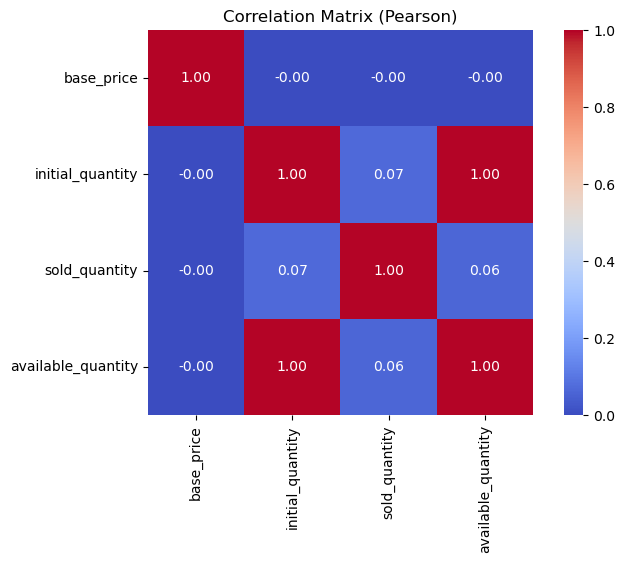

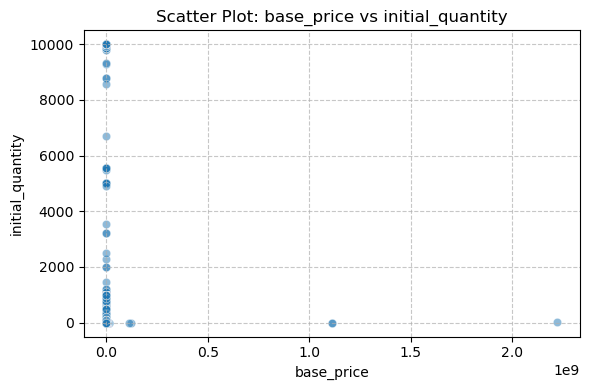

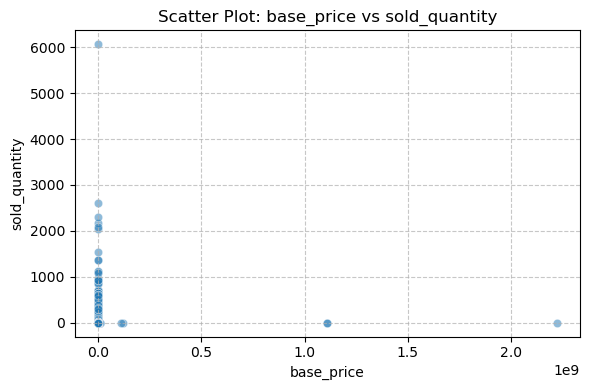

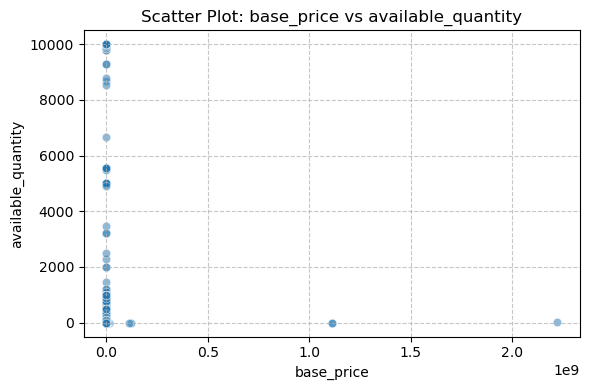

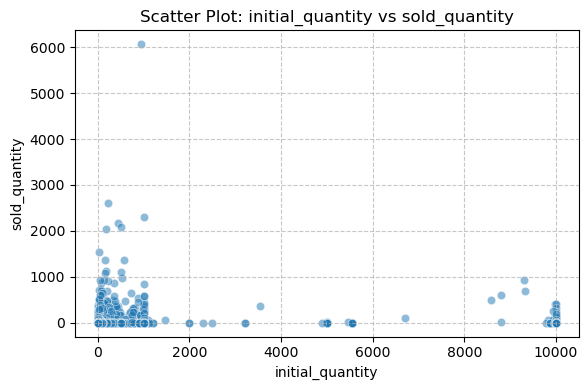

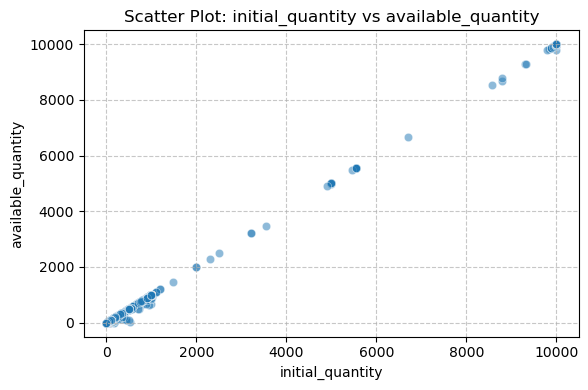

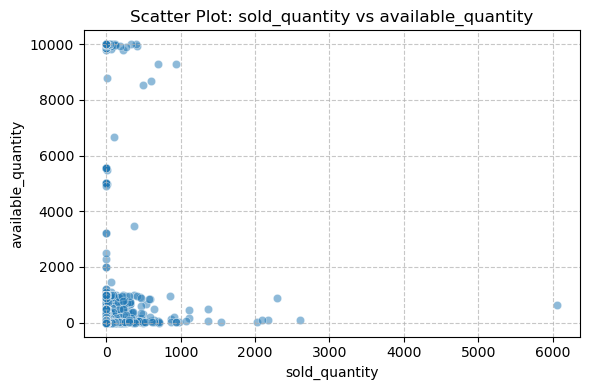

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import spearmanr

# Function to analyze data by separating columns by data type
def analyze_data(data):
    numeric_cols = data.select_dtypes(include=['number']).columns

    print("DataFrame dimensions:", data.shape)
    print("\nNumeric columns:", list(numeric_cols))

    # Statistical summary for numeric columns
    if not numeric_cols.empty:
        print("\nStatistical summary for numeric columns:")
        print(data[numeric_cols].describe())

    # Correlation matrix for numeric columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(8, 5))
        corr = data[numeric_cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
        plt.title('Correlation Matrix (Pearson)')
        plt.show()

    # Sequential scatter plots for pairs of numeric columns
    if len(numeric_cols) >= 2:
        pairs = combinations(numeric_cols, 2)
        for col_x, col_y in pairs:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(data=data, x=col_x, y=col_y, alpha=0.5)
            plt.title(f'Scatter Plot: {col_x} vs {col_y}')
            plt.xlabel(col_x)
            plt.ylabel(col_y)
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

analyze_data(data_train[final_variables])


conclusions
* Delete one variable, initial_quantity or available quantity, this for avoid multicollinearity.
* Transfom the null values of warranty to NO WARRANTY.

## Feature engineering

In [45]:
# The variables we consider up to this point are:
final_variables = [
    'id', 'category_id','base_price', 'title', 'listing_type_id',
    'buying_mode', 'warranty', 'tags', 'initial_quantity', 'sold_quantity', 'available_quantity',
    'start_time', 'last_updated', 'shipping', 'seller_address',
    'non_mercado_pago_payment_methods', 'automatic_relist','condition'
]

In [46]:
data_train[final_variables].head(3)

,id,category_id,base_price,title,listing_type_id,buying_mode,warranty,tags,initial_quantity,sold_quantity,available_quantity,start_time,last_updated,shipping,seller_address,non_mercado_pago_payment_methods,automatic_relist,condition
0,MLA4695330653,MLA126406,80.0,Auriculares Samsung Originales Manos Libres Ca...,bronze,buy_it_now,None,[dragged_bids_and_visits],1,0,1,2015-09-05 20:42:53,2015-09-05T20:42:58.000Z,"{'local_pick_up': True, 'methods': [], 'tags':...","{'country': {'name': 'Argentina', 'id': 'AR'},...","[{'description': 'Transferencia bancaria', 'id...",False,new
1,MLA7160447179,MLA10267,2650.0,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,silver,buy_it_now,NUESTRA REPUTACION,[],1,0,1,2015-09-26 18:08:30,2015-09-26T18:08:34.000Z,"{'local_pick_up': True, 'methods': [], 'tags':...","{'country': {'name': 'Argentina', 'id': 'AR'},...","[{'description': 'Transferencia bancaria', 'id...",False,used
2,MLA7367189936,MLA1227,60.0,"Antigua Revista Billiken, N° 1826, Año 1954",bronze,buy_it_now,None,[dragged_bids_and_visits],1,0,1,2015-09-09 23:57:07,2015-09-09T23:57:10.000Z,"{'local_pick_up': True, 'methods': [], 'tags':...","{'country': {'name': 'Argentina', 'id': 'AR'},...","[{'description': 'Transferencia bancaria', 'id...",False,used


In [47]:
#pip install --upgrade transformers
#pip install --upgrade torch

In [48]:
from transformers import DistilBertModel, DistilBertTokenizer
import torch
from tqdm import tqdm
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
embeddings_model = DistilBertModel.from_pretrained('distilbert-base-uncased')
embeddings_model.eval()

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [49]:
# === VECTORIZE FUNCTIONS ===
def vectorize_title_distilbert(title, tokenizer, embeddings_model):
    """Vectorize a title using a pre-trained DistilBERT model."""
    inputs = tokenizer(title, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = embeddings_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].detach().numpy().flatten()

def apply_embeddings(data, tokenizer, model):
    """Apply embeddings to a DataFrame column using a tokenizer and model."""
    tqdm.pandas()
    return data.progress_apply(lambda title: vectorize_title_distilbert(title, tokenizer, embeddings_model))


In [50]:
from sklearn.preprocessing import StandardScaler
from unidecode import unidecode

def filter_relevant_features(data):
    """Filter only the relevant columns for the analysis."""
    final_variables = [
    'base_price', 'listing_type_id',
    'warranty', 'tags', 'initial_quantity', 'sold_quantity',
    'start_time', 'last_updated', 'shipping', 'seller_address', 'automatic_relist',
    'non_mercado_pago_payment_methods'
    ]
    return data[final_variables]


def get_dummies(data):
    """Convert categorical columns to dummy variables."""
    print('Getting dummies...')
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    return pd.get_dummies(data, columns=categorical_cols, drop_first=True)


def transform_categorical_data_train_test(train_data, test_data, threshold, column_name):
    """Handle high-cardinality categorical variables."""
    column_counts = train_data[column_name].value_counts()
    valid_categories = column_counts[column_counts >= threshold].index
    
    for df in [train_data, test_data]:
        df[column_name] = df[column_name].apply(
            lambda x: x if x in valid_categories else 'OTHER'
        )
    return train_data, test_data


def normalize_data(train_data, test_data=None, scaler=None, columns_to_scale=None):
    if columns_to_scale is None:
        columns_to_scale = ['base_price', 'initial_quantity', 'sold_quantity', 'city_name']

    if scaler is None:
        scaler = StandardScaler()
        train_scaled = scaler.fit_transform(train_data[columns_to_scale])
        test_scaled = scaler.transform(test_data[columns_to_scale]) if test_data is not None else None
    else:
        train_scaled = scaler.transform(train_data[columns_to_scale])
        test_scaled = scaler.transform(test_data[columns_to_scale]) if test_data is not None else None

    train_data = _replace_scaled_columns(train_data, train_scaled, columns_to_scale)
    if test_data is not None:
        test_data = _replace_scaled_columns(test_data, test_scaled, columns_to_scale)

    return train_data, test_data, scaler

# def _replace_scaled_columns(df, scaled_data, columns_to_scale):
#     scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=df.index)
#     df.update(scaled_df)
#     return df


def _replace_scaled_columns(data, scaled_data, columns):
    scaled_df = pd.DataFrame(scaled_data, columns=[f'{col}_scaled' for col in columns], index=data.index)
    return pd.concat([data.drop(columns, axis=1), scaled_df], axis=1)



def get_embeddings_title(data):
    print('Getting embeddings...')
    data_embeddings = apply_embeddings(data, tokenizer, embeddings_model)
    return data_embeddings
    

def transform_warranty(value):
    if value is None or value == "":
        return "no info"
    value = str(value).lower()
    value = unidecode(value)
    if value in ["si", "sí", "s", "yes"] or "mes" in value or "ano" in value or "año" in value:
        return "con garantia"
    if any(keyword in value for keyword in ["sin garantia", "no", "ninguna"]):
        return "sin garantia"
    if "garantia" in value or "garantizamos" in value:
        return "otros con garantia"
    return "no info"


def transform_tags(data):
    """Transform and expand 'tags' into dummy variables."""
    print('Transforming tags...')
    tags_dummies = data['tags'].explode().str.get_dummies().groupby(level=0).sum()
    return pd.concat([data.drop(columns=['tags']), tags_dummies], axis=1)


def transform_dates(data):
    print('Transforming dates...')
    """Transform and extract features from date columns."""
    data['start_time'] = pd.to_datetime(data['start_time'], utc=True).dt.tz_localize(None)
    data['last_updated'] = pd.to_datetime(data['last_updated'], utc=True).dt.tz_localize(None)
    data['updated_since_creation'] = (data['last_updated'] - data['start_time']).dt.days
    data['updated_label'] = (data['updated_since_creation'] >= 1).astype(int)
    return data.drop(columns=['start_time', 'last_updated'])


def transform_shipping(data):
    """Extract and transform shipping information."""
    print('Transforming shipping...')
    data['local_pick_up'] = data['shipping'].apply(lambda x: x.get('local_pick_up') if isinstance(x, dict) else None)
    data['free_shipping'] = data['shipping'].apply(lambda x: x.get('free_shipping') if isinstance(x, dict) else None)
    data['local_pick_up'] = data['local_pick_up'].astype(int)
    data['free_shipping'] = data['free_shipping'].astype(int)
    return data.drop(columns ='shipping')


def transform_automatic_relist(data):
    print('Transforming automatic relistic')
    data['automatic_relist'] = data['automatic_relist'].fillna(False).astype(int)
    data['automatic_relist'] = data['automatic_relist'].astype(int)
    return data


def transform_address(data):
    """Standardize and transform address information."""
    print('Transforming address...')
    def clean_text(value):
        value = str(value).lower()
        value = unidecode(value)
        value = ''.join(e for e in value if e.isalnum() or e.isspace())
        return value.strip()
    data['city_name'] = data['seller_address'].apply(
        lambda x: x['city']['name'] if isinstance(x, dict) and 'city' in x else None
    )
    data['city_name'] = data['city_name'].apply(clean_text)
    data['city_name'] = data['city_name'].replace(['capital federal', 'caba', 'buenos aires',
                                                    'ciudad autonoma de buenos aires'],
                                                      'buenos aires')
    city_counts = data['city_name'].value_counts()
    data['city_name'] = data['city_name'].map(city_counts)
    return data.drop(columns=['seller_address'])


def transform_payment(data):
    """Transform payment method data."""
    print('Transforming payment')
    def normalize_text(text):
        return unidecode(text.lower())
    def create_columns_payment(data):
        categories = {
            'credit_card': ['visa', 'mastercard', 'american express', 'visa electron',
                             'mastercard maestro', 'diners', 'mastercard', 'american express'],
            'bank_transfer': ['transferencia bancaria'],
            'cash': ['efectivo'],
            'marketplace_payment': ['mercadopago'],
            'cheque': ['cheque certificado'],
            'other': ['acordar con el comprador', 'giro postal']
        }

        payment_categories = {category: 0 for category in categories.keys()}

        for method in data:
            description = normalize_text(method['description'])
            matched = False

            for category, values in categories.items():
                if description in values:
                    payment_categories[category] = 1
                    matched = True
                    break

            if not matched:
                payment_categories['other'] = 1

        return payment_categories

    payment_columns = data['non_mercado_pago_payment_methods'].apply(create_columns_payment)
    df_payment_methods = pd.json_normalize(payment_columns)
    df_payment_methods.index = data.index
    data = pd.concat([data, df_payment_methods], axis=1)
    return data.drop(columns='non_mercado_pago_payment_methods')


# === PIPELINE ===
def feature_engineering(data):
    """Apply all feature engineering transformations."""
    data = filter_relevant_features(data)
    data['warranty'] = data['warranty'].apply(transform_warranty)
    data = transform_automatic_relist(data)
    data = transform_tags(data)
    data = transform_dates(data)
    data = transform_shipping(data)
    data = transform_address(data)
    data = transform_payment(data)
    data = get_dummies(data)
    return data



In [51]:
data_example_train = data_train.copy()
data_example_test = data_test.copy()

data_train_embeddings = data_example_train['title']
data_test_embeddings = data_example_test['title']

y_train = data_example_train['condition']
y_test = data_example_test['condition']

y_train = [0 if value == 'new' else 1 for value in y_train]
y_test = [0 if value == 'new' else 1 for value in y_test]

X_train = data_example_train.drop(columns=['condition', 'title'])
X_test = data_example_test.drop(columns=['condition', 'title'])

In [52]:
#X_train_embeddings = get_embeddings_title(data_train_embeddings)

In [53]:
#X_test_embeddings = get_embeddings_title(data_test_embeddings)

In [54]:
#embeddings_train_df = pd.DataFrame(X_train_embeddings, index=data_train_embeddings.index)
#embeddings_test_df = pd.DataFrame(X_test_embeddings, index=data_test_embeddings.index)

# Save as parquet
#embeddings_train_df.to_parquet('train_embeddings.parquet')
#embeddings_test_df.to_parquet('test_embeddings.parquet')

In [ ]:
# Load train and test embeddings
X_train_embeddings = pd.read_parquet('train_embeddings.parquet').title
X_test_embeddings = pd.read_parquet('test_embeddings.parquet').title

In [ ]:
X_train = feature_engineering(X_train.copy())
X_test = feature_engineering(X_test.copy())
X_train, X_test, scaler = normalize_data(X_train, test_data=X_test, scaler=None)
print(X_test.shape, X_train.shape)

Transforming automatic relistic
Transforming tags...
Transforming dates...
Transforming shipping...
Transforming address...
Transforming payment
Getting dummies...
Transforming automatic relistic
Transforming tags...
Transforming dates...
Transforming shipping...
Transforming address...
Transforming payment
Getting dummies...
(10000, 29) (90000, 29)


In [97]:
print(X_train.shape, X_test.shape)

(90000, 29) (10000, 29)


In [53]:
X_train.columns

Index(['automatic_relist', 'dragged_bids_and_visits', 'dragged_visits',
       'free_relist', 'good_quality_thumbnail', 'poor_quality_thumbnail',
       'updated_since_creation', 'updated_label', 'local_pick_up',
       'free_shipping', 'credit_card', 'bank_transfer', 'cash',
       'marketplace_payment', 'cheque', 'other', 'listing_type_id_free',
       'listing_type_id_gold', 'listing_type_id_gold_premium',
       'listing_type_id_gold_pro', 'listing_type_id_gold_special',
       'listing_type_id_silver', 'warranty_no info',
       'warranty_otros con garantia', 'warranty_sin garantia',
       'base_price_scaled', 'initial_quantity_scaled', 'sold_quantity_scaled',
       'city_name_scaled'],
      dtype='object')

In [54]:
X_train_embeddings

0        [-0.23838627, -0.12645388, -0.00588727, 0.0657...
1        [-0.4463306, -0.08176899, 0.21944974, -0.19865...
2        [-0.54447454, 0.07230966, -0.13807367, -0.2510...
3        [-0.02424602, -0.09829326, 0.22414912, -0.0626...
4        [-0.22592048, -0.19856855, 0.023002487, -0.087...
                               ...                        
89995    [-0.12316552, -0.13641241, 0.21602495, -0.0056...
89996    [-0.30413672, -0.15171342, -0.0025725141, -0.0...
89997    [-0.2510776, -0.106641404, 0.28247902, -0.0013...
89998    [-0.28467005, -0.0015458642, -0.21634628, -0.2...
89999    [-0.29161942, -0.07420416, -0.015198395, 0.021...
Name: title, Length: 90000, dtype: object

## Models

In [8]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

def train_xgboost_classifier(
    X_train,
    y_train,
    X_test,
    y_test,
    learning_rate=0.3,
    random_state=42,
    use_embeddings=False,
    X_train_embeddings=None,
    X_test_embeddings=None,
    use_pca=False,
    n_components=100
):
    """
    Train an XGBoost model for classification and generate evaluation metrics.
    Parameters:
    - X_train: DataFrame with the training features.
    - y_train: Series or array with the training labels.
    - X_test: DataFrame with the test features.
    - y_test: Series or array with the test labels.
    - learning_rate: Learning rate for the XGBoost model (default: 0.3).
    - random_state: Random seed for reproducibility (default: 42).
    - use_embeddings: Whether to include embeddings in the model (default: False).
    - X_train_embeddings: Training embeddings (optional if use_embeddings is True).
    - X_test_embeddings: Test embeddings (optional if use_embeddings is True).
    - use_pca: Whether to apply PCA to the combined features (default: False).
    - n_components: Number of principal components if PCA is used (default: 100).

    Returns:
    - model: Trained XGBoost model.
    - importance: DataFrame with features and their importance.
    """
    if use_embeddings:
        if X_train_embeddings is None or X_test_embeddings is None:
            raise ValueError("X_train_embeddings y X_test_embeddings are required if use_embeddings is True.")

        X_train_embeddings_array = np.vstack(X_train_embeddings)
        X_test_embeddings_array = np.vstack(X_test_embeddings)

        X_train_embeddings_df = pd.DataFrame(
            X_train_embeddings_array, 
            columns=[f'title_embedding_{i}' for i in range(X_train_embeddings_array.shape[1])]
        )
        X_test_embeddings_df = pd.DataFrame(
            X_test_embeddings_array, 
            columns=[f'title_embedding_{i}' for i in range(X_test_embeddings_array.shape[1])]
        )

        X_train = pd.concat([X_train.reset_index(drop=True), X_train_embeddings_df.reset_index(drop=True)], axis=1)
        X_test = pd.concat([X_test.reset_index(drop=True), X_test_embeddings_df.reset_index(drop=True)], axis=1)

    if use_pca:
        pca = PCA(n_components=n_components)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

    model = xgb.XGBClassifier(
        random_state=random_state,
        use_label_encoder=False,
        eval_metric='logloss',
        learning_rate=learning_rate
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    if use_pca:
        feature_names = [f'PC{i+1}' for i in range(X_train.shape[1])]
    else:
        feature_names = X_train.columns

    importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importances:")
    print(importance)

    return model, X_train # return data after transformation to have a map of the final variables and replicate in new data


#### Xgboost model

In [9]:
model_xgboost, data_train_sample = train_xgboost_classifier(X_train,
    y_train,
    X_test,
    y_test,
    learning_rate=0.3,
    random_state=42,
    use_embeddings=False,
    X_train_embeddings=None,
    X_test_embeddings=None,
    use_pca=False,
    n_components=100
)

C:\Users\joral_08cedew\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5406
           1       0.82      0.82      0.82      4594

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000


Confusion Matrix:
[[4560  846]
 [ 821 3773]]

Feature Importances:
                         Feature  Importance
26       initial_quantity_scaled    0.339362
16          listing_type_id_free    0.278366
9                  free_shipping    0.055938
27          sold_quantity_scaled    0.040413
18  listing_type_id_gold_premium    0.033410
1        dragged_bids_and_visits    0.029793
0               automatic_relist    0.023376
25             base_price_scaled    0.019620
24         warranty_sin garantia    0.019234
14                        cheque    0.018976
22              warranty_no info    0.018520
3                    fre

#### Xgboost model with embeddings

In [118]:
model_xgboost_bert, data_train_sample = train_xgboost_classifier(X_train,
    y_train,
    X_test,
    y_test,
    learning_rate=0.3,
    random_state=42,
    use_embeddings=True,
    X_train_embeddings=X_train_embeddings,
    X_test_embeddings=X_test_embeddings,
    use_pca=False,
    n_components=100
)

C:\Users\joral_08cedew\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.8680

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5406
           1       0.84      0.87      0.86      4594

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Confusion Matrix:
[[4666  740]
 [ 580 4014]]

Feature Importances:
                      Feature  Importance
26    initial_quantity_scaled    0.120756
16       listing_type_id_free    0.050091
311       title_embedding_282    0.015721
187       title_embedding_158    0.013251
27       sold_quantity_scaled    0.012353
..                        ...         ...
216       title_embedding_187    0.000000
19   listing_type_id_gold_pro    0.000000
17       listing_type_id_gold    0.000000
93         title_embedding_64    0.000000
7               updated_label    0.000000

[797 rows x 2 columns]


#### Grid search for base xgboost model

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # cross validation with 3 folds
    verbose=1,
    n_jobs=-1
)

print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': grid_search.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance)


C:\Users\joral_08cedew\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\joral_08cedew\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\joral_08cedew\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Starting Grid Search...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score: 0.8421178253594596

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5406
           1       0.83      0.82      0.82      4594

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


Feature Importances:
                         Feature  Importance
26       initial_quantity_scaled    0.316544
16          listing_type_id_free    0.298236
27          sold_quantity_scaled    0.055891
9                  free_shipping    0.037748
1        dragged_bids_and_visits    0.034171
25             base_price_scaled    0.028171
0               automatic_relist    0.024261
24         warr

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

def train_logistic_regression(
    X_train,
    y_train,
    X_test,
    y_test,
    random_state=42,
    use_embeddings=False,
    X_train_embeddings=None,
    X_test_embeddings=None,
    use_pca=False,
    n_components=100
):
    """
    Train a Logistic Regression model for classification and generate evaluation metrics.

    Parameters:
    - X_train: DataFrame with the training features.
    - y_train: Series or array with the training labels.
    - X_test: DataFrame with the test features.
    - y_test: Series or array with the test labels.
    - random_state: Random seed for reproducibility (default: 42).
    - use_embeddings: Whether to include embeddings in the model (default: False).
    - X_train_embeddings: Training embeddings (optional if use_embeddings is True).
    - X_test_embeddings: Test embeddings (optional if use_embeddings is True).
    - use_pca: Whether to apply PCA to the features (default: False).
    - n_components: Number of principal components if PCA is used (default: 100).

    Returns:
    - model: Trained Logistic Regression model.
    - X_train: Transformed training data (if PCA applied or embeddings added).
    """
    # Incorporate embeddings if requested
    if use_embeddings:
        if X_train_embeddings is None or X_test_embeddings is None:
            raise ValueError("X_train_embeddings and X_test_embeddings are required if use_embeddings is True.")

        X_train_embeddings_array = np.vstack(X_train_embeddings)
        X_test_embeddings_array = np.vstack(X_test_embeddings)

        X_train_embeddings_df = pd.DataFrame(
            X_train_embeddings_array,
            columns=[f'title_embedding_{i}' for i in range(X_train_embeddings_array.shape[1])]
        )
        X_test_embeddings_df = pd.DataFrame(
            X_test_embeddings_array,
            columns=[f'title_embedding_{i}' for i in range(X_test_embeddings_array.shape[1])]
        )

        X_train = pd.concat([X_train.reset_index(drop=True), X_train_embeddings_df.reset_index(drop=True)], axis=1)
        X_test = pd.concat([X_test.reset_index(drop=True), X_test_embeddings_df.reset_index(drop=True)], axis=1)

    if use_pca:
        pca = PCA(n_components=n_components, random_state=random_state)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

    model = LogisticRegression(random_state=random_state, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    if use_pca:
        feature_names = [f'PC{i+1}' for i in range(X_train.shape[1])]
    else:
        feature_names = X_train.columns

    # Logistic Regression does not have built-in feature importances, so coefficients are used
    importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)

    print("\nFeature Coefficients:")
    print(importance)

    return model, X_train


#### Logistic regression model (using PCA and embeddings)

In [74]:
model_logistic_regression = train_logistic_regression(
    X_train,
    y_train,
    X_test,
    y_test,
    random_state=42,
    use_embeddings=True,
    X_train_embeddings=X_train_embeddings,
    X_test_embeddings=X_test_embeddings,
    use_pca=True,
    n_components=500
)

Accuracy: 0.8379

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      5406
           1       0.85      0.79      0.82      4594

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000


Confusion Matrix:
[[4739  667]
 [ 954 3640]]

Feature Coefficients:
    Feature  Coefficient
498   PC499     2.122914
322   PC323     1.765244
18     PC19     1.553394
221   PC222     1.431098
270   PC271     1.420603
..      ...          ...
439   PC440    -1.761669
293   PC294    -1.835683
25     PC26    -2.656641
6       PC7    -3.061684
3       PC4    -9.202062

[500 rows x 2 columns]


#### Neural network model with embeddings

In [ ]:
# pip install tensorflow

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
from tensorflow.keras.utils import to_categorical

def train_nn_classifier(
    X_train,
    y_train,
    X_test,
    y_test,
    learning_rate=0.001,
    random_state=42,
    use_embeddings=False,
    X_train_embeddings=None,
    X_test_embeddings=None,
    use_pca=False,
    n_components=100,
    batch_size=32,
    epochs=10,
    num_classes=2
):
    """
    Train a neural network model for classification and generate evaluation metrics.
    Parameters:
    - X_train: DataFrame or array with the training features.
    - y_train: Series or array with the training labels.
    - X_test: DataFrame or array with the test features.
    - y_test: Series or array with the test labels.
    - learning_rate: The learning rate for the Adam optimizer (default: 0.001).
    - random_state: Random seed for reproducibility (default: 42).
    - use_embeddings: Whether to include embeddings in the model (default: False).
    - X_train_embeddings: Training embeddings (optional if use_embeddings is True).
    - X_test_embeddings: Test embeddings (optional if use_embeddings is True).
    - use_pca: Whether to apply PCA to the combined features (default: False).
    - n_components: Number of principal components to retain if PCA is applied (default: 100).
    - batch_size: The batch size used in training (default: 32).
    - epochs: Number of epochs to train the model (default: 10).
    - num_classes: Number of output classes for classification (optional; if not provided, inferred from y_train).

    Returns:
    - model: The trained neural network model.
    """

    if use_embeddings:
        if X_train_embeddings is None or X_test_embeddings is None:
            raise ValueError("X_train_embeddings y X_test_embeddings are required if use_embeddings is True.")

        X_train_embeddings_array = np.vstack(X_train_embeddings)
        X_test_embeddings_array = np.vstack(X_test_embeddings)

        X_train_embeddings_df = pd.DataFrame(
            X_train_embeddings_array, 
            columns=[f'title_embedding_{i}' for i in range(X_train_embeddings_array.shape[1])]
        )
        X_test_embeddings_df = pd.DataFrame(
            X_test_embeddings_array, 
            columns=[f'title_embedding_{i}' for i in range(X_test_embeddings_array.shape[1])]
        )

        X_train = pd.concat([X_train.reset_index(drop=True), X_train_embeddings_df.reset_index(drop=True)], axis=1)
        X_test = pd.concat([X_test.reset_index(drop=True), X_test_embeddings_df.reset_index(drop=True)], axis=1)

    if use_pca:
        pca = PCA(n_components=n_components)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

    # Ensure X_train and X_test are numpy arrays
    X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else np.array(X_train)
    X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else np.array(X_test)

    # Ensure y_train and y_test are numpy arrays
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    # Convert labels to categorical if needed
    if num_classes > 1:
        y_train = to_categorical(y_train, num_classes=num_classes)
        y_test = to_categorical(y_test, num_classes=num_classes)

    # Build the Neural Network model
    model = Sequential()
    
    model.add(Dense(256, input_dim=X_train.shape[1]))
    model.add(LeakyReLU(alpha=0.1))  # LeakyReLU en lugar de ReLU
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(num_classes, activation='softmax' if num_classes > 1 else 'sigmoid'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy' if num_classes > 1 else 'binary_crossentropy', 
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1) if num_classes > 1 else (y_pred > 0.5).astype(int)

    # Evaluation metrics
    accuracy = accuracy_score(np.argmax(y_test, axis=1) if num_classes > 1 else y_test, y_pred_classes)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(np.argmax(y_test, axis=1) if num_classes > 1 else y_test, y_pred_classes))
    print("\nConfusion Matrix:")
    print(confusion_matrix(np.argmax(y_test, axis=1) if num_classes > 1 else y_test, y_pred_classes))

    return model


In [82]:
nn_model = train_nn_classifier(
    X_train,
    y_train,
    X_test,
    y_test,
    learning_rate=0.001,
    random_state=42,
    use_embeddings=True,
    X_train_embeddings=X_train_embeddings,
    X_test_embeddings=X_test_embeddings,
    use_pca=False,
    n_components=100,
    batch_size=32,
    epochs=95,
    num_classes=2)


Epoch 1/10
2813/2813 - 11s - loss: 0.4524 - accuracy: 0.7930 - val_loss: 0.3886 - val_accuracy: 0.8308 - 11s/epoch - 4ms/step
Epoch 2/10
2813/2813 - 8s - loss: 0.4015 - accuracy: 0.8208 - val_loss: 0.3938 - val_accuracy: 0.8297 - 8s/epoch - 3ms/step
Epoch 3/10
2813/2813 - 8s - loss: 0.3915 - accuracy: 0.8261 - val_loss: 0.3767 - val_accuracy: 0.8370 - 8s/epoch - 3ms/step
Epoch 4/10
2813/2813 - 8s - loss: 0.3837 - accuracy: 0.8288 - val_loss: 0.3797 - val_accuracy: 0.8382 - 8s/epoch - 3ms/step
Epoch 5/10
2813/2813 - 7s - loss: 0.3778 - accuracy: 0.8332 - val_loss: 0.3853 - val_accuracy: 0.8302 - 7s/epoch - 3ms/step
Epoch 6/10
2813/2813 - 7s - loss: 0.3698 - accuracy: 0.8381 - val_loss: 0.3862 - val_accuracy: 0.8258 - 7s/epoch - 3ms/step
Epoch 7/10
2813/2813 - 7s - loss: 0.3664 - accuracy: 0.8392 - val_loss: 0.3737 - val_accuracy: 0.8449 - 7s/epoch - 3ms/step
Epoch 8/10
2813/2813 - 7s - loss: 0.3628 - accuracy: 0.8403 - val_loss: 0.3625 - val_accuracy: 0.8472 - 7s/epoch - 3ms/step
Epoch 

## Save models

In [101]:
import pickle
# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model_xgboost_bert, f)

In [102]:
# Load model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

data_example = data[-10000:]

In [88]:
def feature_engineering_for_new_data(new_data, scaler, columns_to_scale):
    """
    Process new data with the same transformations of training dataset
    """
    new_data = filter_relevant_features(new_data)
    new_data['warranty'] = new_data['warranty'].apply(transform_warranty)
    new_data = transform_automatic_relist(new_data)
    new_data = transform_tags(new_data)
    new_data = transform_dates(new_data)
    new_data = transform_shipping(new_data)
    new_data = transform_address(new_data)
    new_data = transform_payment(new_data)
    
    new_data = pd.get_dummies(new_data)
    for col in columns_to_scale:
        if col not in new_data.columns:
            new_data[col] = 0

    new_data_scaled = scaler.transform(new_data[columns_to_scale])
    new_data = _replace_scaled_columns(new_data, new_data_scaled, columns_to_scale)

    return new_data

def align_columns(train_data, new_data):
    """
    Allign new data columns with the final columns of the training dataset
    """
    for col in train_data.columns:
        if col not in new_data.columns:
            new_data[col] = 0

    new_data = new_data[train_data.columns]
    
    return new_data

In [103]:
X_new = feature_engineering_for_new_data(
    new_data=data_example.copy(), 
    scaler=scaler, 
    columns_to_scale=['base_price', 'initial_quantity', 'sold_quantity', 'city_name']
)

Transforming automatic relistic
Transforming tags...
Transforming dates...
Transforming shipping...
Transforming address...
Transforming payment


In [104]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
embeddings_model = DistilBertModel.from_pretrained('distilbert-base-uncased')
data_example_embeddings = get_embeddings_title(data_example['title'])
data_example_embeddings_array = np.vstack(data_example_embeddings)
data_example_embeddings_df = pd.DataFrame(data_example_embeddings_array, columns=[f'title_embedding_{i}' for i in range(data_example_embeddings_array.shape[1])])
data_example_combined = pd.concat([X_new.reset_index(drop=True), data_example_embeddings_df.reset_index(drop=True)], axis=1)
data_example_combined = align_columns(data_train_sample, data_example_combined)

Getting embeddings...


100%|██████████| 10000/10000 [01:55<00:00, 86.53it/s]


In [105]:
data_example_combined = data_example_combined[data_train_sample.columns]

In [106]:
y_new_pred = model.predict(data_example_combined)
print("New data prediction:", y_new_pred)

New data prediction: [0 0 0 ... 1 1 1]
